In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression_Salah:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate   
        self.n_iters = n_iters          

    def fit(self, x, y):

        x = np.array(x).reshape(-1)
        y = np.array(y).reshape(-1)
      
        
        self.w = 0
        self.b = 0
        self.sse_array = [] 

        for i in range(self.n_iters):
            y_hat = self.w * x + self.b

            D_w = (2 / len(x)) * np.sum(x * (y_hat - y))
            D_b = (2 / len(x)) * np.sum(y_hat - y)

            self.w -= self.lr * D_w
            self.b -= self.lr * D_b

            sse = np.sum((y_hat - y) ** 2)
            self.sse_array.append(sse)

            if (i + 1) % 100== 0:  
                print(f"iteration {i+1}: sse={sse:.4f}")

    def predict(self, x):
        x = np.array(x).reshape(-1) 
        y_hat = self.w * x + self.b
        return y_hat


 

In [154]:
data = pd.read_csv(r"D:\AI\ai_deploma_master\ai_deploma_master\code\M_L\Salary_Data.csv")
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

model = LinearRegression_Salah(learning_rate=0.001, n_iters=1000)

model.fit(x, y)
y_hat = model.predict(x)
print(y_hat)

iteration 100: sse=4334848326.2140
iteration 200: sse=4059173721.8272
iteration 300: sse=3805915410.6128
iteration 400: sse=3573207834.4031
iteration 500: sse=3359383396.5467
iteration 600: sse=3162909818.1215
iteration 700: sse=2982379157.5188
iteration 800: sse=2816497721.0484
iteration 900: sse=2664076792.2509
iteration 1000: sse=2524024113.4835
[ 23107.78859877  25461.69260063  27815.59660248  33700.35660713
  36054.26060898  44292.92461548  45469.87661641  47823.78061826
  47823.78061826  53708.54062291  56062.44462476  57239.39662569
  57239.39662569  58416.34862662  63124.15663033  67831.96463405
  70185.8686359   72539.77263776  79601.48464333  80778.43664426
  90194.05265168  93724.90865447 103140.52466189 106671.38066468
 112556.14066932 116086.9966721  121971.75667675 123148.70867767
 131387.37268417 133741.27668603]


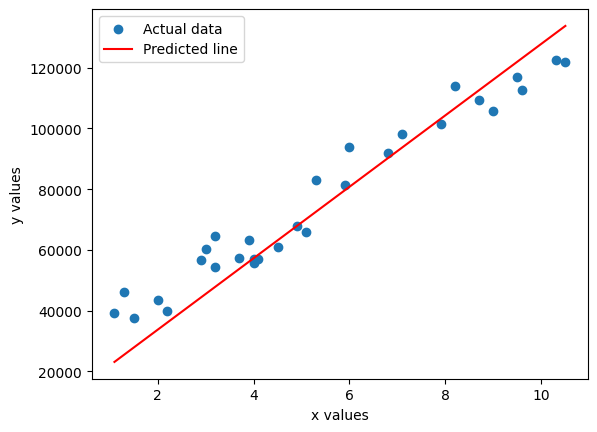

In [155]:
plt.scatter(x, y, label='Actual data')
plt.plot(x, y_hat, label='Predicted line', color='red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()